In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mlt

In [2]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [3]:
from tensorflow.keras.callbacks import TensorBoard

In [4]:
tb = TensorBoard(log_dir="logs\{}".format("Self_model_1"))

In [5]:
mnist = keras.datasets.mnist

In [6]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

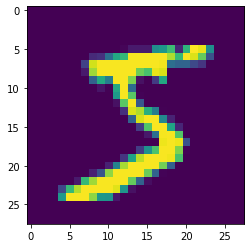

In [7]:
plt.imshow(train_X[0])

This shows that the image is infact a grayscale image and not a coloured images else it would have a 3 Dimension for RGB.

## Data Normalization

In [8]:
x_train_n = (train_X)/255.0
x_test_n = test_X/255.0

In [9]:
x_valid,x_train = x_train_n[:30000],x_train_n[30000:]
y_valid,y_train = train_y[:30000],train_y[30000:]
x_test = x_test_n

## Describing the architecture of the network

In [10]:
np.random.seed(42)
tf.random.set_random_seed(42)

In [11]:
model = tf.keras.models.Sequential()

In [12]:
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))
model.add(tf.keras.layers.Dense(64,activation="sigmoid"))
model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [13]:
from keras.optimizers import SGD

In [14]:
sgd = SGD(learning_rate=0.01,name="SGD")

In [15]:
model.compile(loss="sparse_categorical_crossentropy",optimizer = "sgd", metrics= ['accuracy'])

In [16]:
x_train.shape

(30000, 28, 28)

In [17]:
y_train.shape

(30000,)

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 59,850
Trainable params: 59,850
Non-trainable params: 0
_________________________________________________________________


In [19]:
model_history = model.fit(x_train,y_train,epochs= 60,validation_data= [x_valid,y_valid],callbacks=[tb])

Train on 30000 samples, validate on 30000 samples
Epoch 1/60
30000/30000 [==============================] - 2s 81us/sample - loss: 1.9919 - acc: 0.4971 - val_loss: 1.5145 - val_acc: 0.6432
Epoch 2/60
30000/30000 [==============================] - 2s 70us/sample - loss: 1.0864 - acc: 0.7464 - val_loss: 0.8029 - val_acc: 0.7868
Epoch 3/60
30000/30000 [==============================] - 2s 68us/sample - loss: 0.6674 - acc: 0.8287 - val_loss: 0.5809 - val_acc: 0.8432
Epoch 4/60
30000/30000 [==============================] - 2s 65us/sample - loss: 0.5181 - acc: 0.8605 - val_loss: 0.4790 - val_acc: 0.8686
Epoch 5/60
30000/30000 [==============================] - 2s 62us/sample - loss: 0.4424 - acc: 0.8780 - val_loss: 0.4229 - val_acc: 0.8832
Epoch 6/60
30000/30000 [==============================] - 2s 68us/sample - loss: 0.3976 - acc: 0.8895 - val_loss: 0.3891 - val_acc: 0.8895
Epoch 7/60
30000/30000 [==============================] - 2s 65us/sample - loss: 0.3680 - acc: 0.8957 - val_loss: 0.

30000/30000 [==============================] - 3s 86us/sample - loss: 0.1288 - acc: 0.9631 - val_loss: 0.1691 - val_acc: 0.9493
Epoch 60/60
30000/30000 [==============================] - 3s 87us/sample - loss: 0.1267 - acc: 0.9643 - val_loss: 0.1688 - val_acc: 0.9489


In [20]:
model_history.params

{'batch_size': 32,
 'epochs': 60,
 'steps': None,
 'samples': 30000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc']}

In [21]:
weights,biases = model.layers[1].get_weights()

In [22]:
weights

array([[ 0.0699972 , -0.016636  , -0.03537396, ...,  0.00141795,
         0.02419212, -0.0568816 ],
       [-0.07539292,  0.07408797,  0.0788788 , ..., -0.03601811,
         0.01848768, -0.08221341],
       [-0.01657557,  0.02755793, -0.0624108 , ...,  0.0131444 ,
         0.00273632,  0.00613327],
       ...,
       [ 0.05499253,  0.00541238, -0.02016355, ...,  0.02767916,
        -0.07299439, -0.03086143],
       [-0.0221363 ,  0.07062673, -0.02173867, ...,  0.00245322,
        -0.07075792,  0.05816441],
       [-0.00878664, -0.03370789,  0.0558267 , ..., -0.04912586,
         0.06164861,  0.04172406]], dtype=float32)

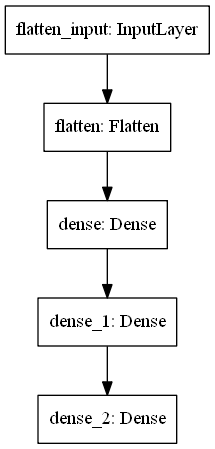

In [23]:
import pydot
tf.keras.utils.plot_model(model)

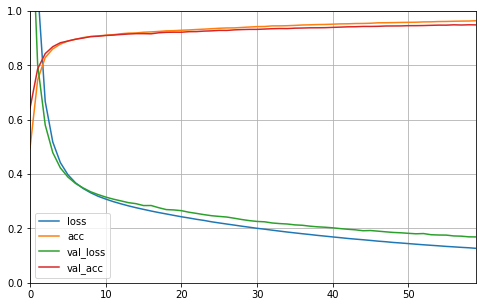

In [24]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [25]:
model.evaluate(x_test,test_y)

10000/10000 [==============================] - 0s 23us/sample - loss: 0.1594 - acc: 0.9523


[0.15937023254707455, 0.9523]

In [26]:
new_x=x_test[:3]

In [27]:
y_pred = model.predict_classes(x_test)

In [28]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

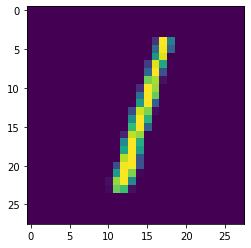

In [29]:
plt.imshow(x_test[2])

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
y_pred.shape

(10000,)

In [32]:
confusion_matrix(test_y,y_pred)

array([[ 965,    0,    1,    1,    0,    5,    6,    1,    1,    0],
       [   0, 1119,    2,    1,    0,    1,    5,    2,    5,    0],
       [   8,    2,  977,   11,    4,    1,   11,    9,    7,    2],
       [   1,    2,   12,  962,    0,   12,    1,   12,    6,    2],
       [   1,    0,    8,    0,  934,    0,    6,    5,    3,   25],
       [   9,    3,    1,   19,    5,  828,    8,    4,    8,    7],
       [   8,    3,    1,    0,    5,   11,  923,    2,    5,    0],
       [   0,    8,   20,    6,    7,    1,    0,  969,    0,   17],
       [   5,    2,    5,   17,    9,   11,    9,    8,  903,    5],
       [   9,    7,    1,   11,   23,    6,    1,    8,    0,  943]],
      dtype=int64)

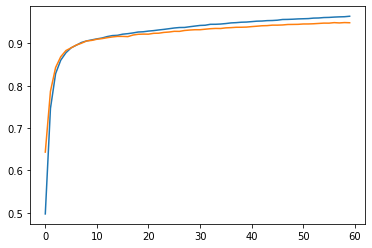

In [33]:
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])

In [34]:
model.save("Self_model_1.h5")

In [35]:
del model
keras.backend.clear_session()

In [36]:
m = tf.keras.models.load_model("Self_model_1.h5")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [37]:
m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 59,850
Trainable params: 59,850
Non-trainable params: 0
_________________________________________________________________
